In [510]:
#1. Import all the worksheets in excel file(Employee Attrition_Details.xlsx) 

import pandas as pd

xls = pd.ExcelFile('Employee Attrition_Details.xlsx')
demographics_df = pd.read_excel(xls, 'Employee Demographics')
job_info_df= pd.read_excel(xls, 'Employee Job Info')
satisfaction_info_df=pd.read_excel(xls,'Emp_Satisfaction_Survey_info')
attrition_df=pd.read_excel(xls,'Employee Attrition Details')

demographics_df.head()


,EmployeeNumber,Age,Education,EducationField,Gender,MaritalStatus,Over18
0,1,41.0,College,Life Sciences,Female,Single,Y
1,2,49.0,Below College,Life Sciences,Male,Married,Y
2,4,37.0,College,Other,Male,Single,Y
3,5,33.0,Master,Life Sciences,Female,Married,Y
4,7,27.0,Below College,Medical,Male,Married,Y


In [511]:
#2. Perform detailed data checks (missing values, outliers, duplicates, special characters ($, #, #NA, #error, #Name, Currencies, Null values,?,@ Inf, -inf, #error,  #value…etc…), mis-match in data types, renaming required for variables, format of data (specially dates),
#Identify unique id/Unique identifier or key variables (primary key/foreign key)  in the data, is data encoded etc...). 
#List out all possible problems in the data 

demographics_df.info()
job_info_df.info()
satisfaction_info_df.info()
attrition_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EmployeeNumber  1470 non-null   int64  
 1   Age             1466 non-null   float64
 2   Education       1465 non-null   object 
 3   EducationField  1462 non-null   object 
 4   Gender          1467 non-null   object 
 5   MaritalStatus   1467 non-null   object 
 6   Over18          1464 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 80.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   EmployeeNumber               1470 non-null   int64  
 1   Department                   1470 non-null   object 
 2   BusinessTravel               1470 non-null   object 
 3   DistanceFromHome        

In [544]:
#checking for missing values

print("Demographics_df has following missing values: ",demographics_df.isnull().sum())
print("Jobs_info_df has following missing values: ",job_info_df.isnull().sum())
print("Satisfaction_df has following missing values:",satisfaction_info_df.isnull().sum())
print("Attrition_df has following missing values:",attrition_df.isnull().sum())

Demographics_df has following missing values:  EmployeeNumber    0
Age               4
Education         5
EducationField    8
Gender            3
MaritalStatus     3
Over18            6
dtype: int64
Jobs_info_df has following missing values:  EmployeeNumber                 0
Department                     0
BusinessTravel                 0
DistanceFromHome               0
JobInvolvement                 1
JobLevel                       1
JobRole                        1
MonthlySalary                  3
NumCompaniesWorked             3
OverTime                       1
PercentSalaryHike_last_year    1
PerformanceRating              1
StockOptionLevel               2
TrainingTimesLastYear          0
YearsAtCompany                 0
YearsInCurrentRole             0
YearsSinceLastPromotion        0
YearsWithCurrManager           0
dtype: int64
Satisfaction_df has following missing values: EmployeeNumber                      0
EnvironmentSatisfaction             0
JobInvolvement             

In [513]:
#checking for duplicates

print("Unique values in Demographics_df:",demographics_df.nunique())
print("Unique values in Job Info_df:",job_info_df.nunique())
print("Unique values in Satisfaction_df:",satisfaction_info_df.nunique())
print("Unique values in attrition_df:",attrition_df.nunique())



Unique values in Demographics_df: EmployeeNumber    1470
Age                 43
Education            5
EducationField       6
Gender               2
MaritalStatus        3
Over18               1
dtype: int64
Unique values in Job Info_df: EmployeeNumber                 1470
Department                        3
BusinessTravel                    3
DistanceFromHome                 31
JobInvolvement                    4
JobLevel                          5
JobRole                           9
MonthlySalary                  1346
NumCompaniesWorked               10
OverTime                          2
PercentSalaryHike_last_year      15
PerformanceRating                 2
StockOptionLevel                  4
TrainingTimesLastYear             7
YearsAtCompany                   37
YearsInCurrentRole               19
YearsSinceLastPromotion          16
YearsWithCurrManager             18
dtype: int64
Unique values in Satisfaction_df: EmployeeNumber                      1470
EnvironmentSatisfaction   

In [514]:
#mis-match datatypes, converting to actual datatypes 

for df in [demographics_df,job_info_df,satisfaction_info_df,attrition_df] :
    for col in df.columns:
        if df[col].dtype=='object':
            df[col] = df[col].astype('string')



In [515]:
#checking for special characters

import string 

alphabet=string.ascii_letters

for df in [demographics_df,job_info_df,satisfaction_info_df,attrition_df] :
    columns=df.columns
    print("performing special char check for dataframe")
    for col in columns :
        if df[col].dtype=='object':
           df[col].str.strip(alphabet).astype(bool).any()
        
    

performing special char check for dataframe
performing special char check for dataframe
performing special char check for dataframe
performing special char check for dataframe


In [516]:
#3. Join (merging) all the data frames (base table as employee demographics table) and name the final table as 'final_data' 

mergedata_1=demographics_df.merge(job_info_df,on='EmployeeNumber',how='inner')
mergedata_2=mergedata_1.merge(satisfaction_info_df,on='EmployeeNumber',how='inner')
final_data=mergedata_2.merge(attrition_df,on='EmployeeNumber',how='inner')

final_data.head()


,EmployeeNumber,Age,Education,EducationField,Gender,MaritalStatus,Over18,Department,BusinessTravel,DistanceFromHome,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobInvolvement_y,JobSatisfaction,Manager_RelationshipSatisfaction,WorkLifeBalance,Attrition
0,1,41.0,College,Life Sciences,Female,Single,Y,Sales,Travel_Rarely,1,...,6,4,0,5,Medium,High,Very High,Low,Bad,Yes
1,2,49.0,Below College,Life Sciences,Male,Married,Y,Research & Development,Travel_Frequently,8,...,10,7,1,7,High,Medium,Medium,Very High,Better,No
2,4,37.0,College,Other,Male,Single,Y,Research & Development,Travel_Rarely,2,...,0,0,0,0,Very High,Medium,High,Medium,Better,Yes
3,5,33.0,Master,Life Sciences,Female,Married,Y,Research & Development,Travel_Frequently,3,...,8,7,3,0,Very High,High,High,High,Better,No
4,7,27.0,Below College,Medical,Male,Married,Y,Research & Development,Travel_Rarely,2,...,2,2,2,2,Low,High,Medium,Very High,Better,No


In [517]:
#4. Find the distinct values in each variable in the joined data set 
#(Note: You should create user defined function for the same)

def distvals(inp):
    print(f"unique values in the provided input is: {final_data[inp].unique}")

distvals('Age')


unique values in the provided input is: <bound method Series.unique of 0       41.0
1       49.0
2       37.0
3       33.0
4       27.0
        ... 
1465    36.0
1466    39.0
1467    27.0
1468    49.0
1469    34.0
Name: Age, Length: 1470, dtype: float64>


In [518]:
#5. Find below metrics for numerical columns
#Number of values, number of missing's, number of distinct values, number of zeros, sum, mean, median, std, variance, min, max, range, P1, P5, P10, P25, P50, P75, P90, P95, P99 
#(Note: You should create user defined function for the same) 

import numpy as np

def metrics_num(variable):
    # Number of missing values
    num_missing = variable.isnull().sum()
    total_values = len(variable)
    distinct_values=len(variable.unique())
    zero_count=(variable==0).sum()
    
    # Basic statistics
    min_val = variable.min()
    max_val = variable.max()
    total_sum = variable.sum()
    mean_val = variable.mean()
    median_val = variable.median()
    variance_val = variable.var()
    std_dev = variable.std()
        
        
    # Percentile values
    percentile_1 = np.percentile(variable.dropna(), 1)      
    percentile_5 = np.percentile(variable.dropna(), 5)
    percentile_10 = np.percentile(variable.dropna(), 10)
    percentile_25 = np.percentile(variable.dropna(), 25)
    percentile_50 = np.percentile(variable.dropna(), 50)
    percentile_75 = np.percentile(variable.dropna(), 75)
    percentile_90 = np.percentile(variable.dropna(), 90)
    percentile_95 = np.percentile(variable.dropna(), 95)
    percentile_99 = np.percentile(variable.dropna(), 99)
        
    # Output the analysis
    print(f"Number of Missing Values: {num_missing}")
    print(f"Number of Values: {total_values}")
    print(f"Number of Zeroes: {zero_count}")
    print(f"Distinct Values: {distinct_values}")
    print(f"Minimum Value: {min_val}")
    print(f"Maximum Value: {max_val}")
    print(f"Range : {max_val-min_val}")
    print(f"Sum of Values: {total_sum}")
    print(f"Mean Value: {mean_val}")
    print(f"Median Value: {median_val}")
    print(f"Variance: {variance_val}")
    print(f"1st Percentile: {percentile_1}")
    print(f"5th Percentile: {percentile_5}")
    print(f"10th Percentile: {percentile_10}")
    print(f"25th Percentile: {percentile_25}")
    print(f"50th Percentile (Median): {percentile_50}")
    print(f"75th Percentile: {percentile_75}")
    print(f"90th Percentile: {percentile_90}")
    print(f"95th Percentile: {percentile_95}")
    print(f"99th Percentile: {percentile_99}")

metrics_num(final_data['Age'])




Number of Missing Values: 4
Number of Values: 1470
Number of Zeroes: 0
Distinct Values: 44
Minimum Value: 18.0
Maximum Value: 60.0
Range : 42.0
Sum of Values: 54111.0
Mean Value: 36.910641200545705
Median Value: 36.0
Variance: 83.48893788209622
1st Percentile: 19.0
5th Percentile: 24.0
10th Percentile: 26.0
25th Percentile: 30.0
50th Percentile (Median): 36.0
75th Percentile: 43.0
90th Percentile: 50.0
95th Percentile: 54.0
99th Percentile: 58.34999999999991


In [519]:
#6. Find below metrics for categorical columns
#Number of values, number of missing's, number of distinct values, Frequency for each category
#(Note: You should create user defined function for the same) 

def metrics_cat(variable):
    num_missing = variable.isnull().sum()
    total_values = len(variable)
    distinct_values=len(variable.unique())

    freq=variable.value_counts(dropna=False)

    print(f"Number of Missing Values: {num_missing}")
    print(f"Number of Values: {total_values}")
    print(f"Distinct Values: {distinct_values}")
    print(f"Frequency: {freq}")

metrics_cat(final_data['Education'])


    

Number of Missing Values: 5
Number of Values: 1470
Distinct Values: 6
Frequency: Education
Bachelor         569
Master           397
College          281
Below College    170
Doctor            48
<NA>               5
Name: count, dtype: Int64


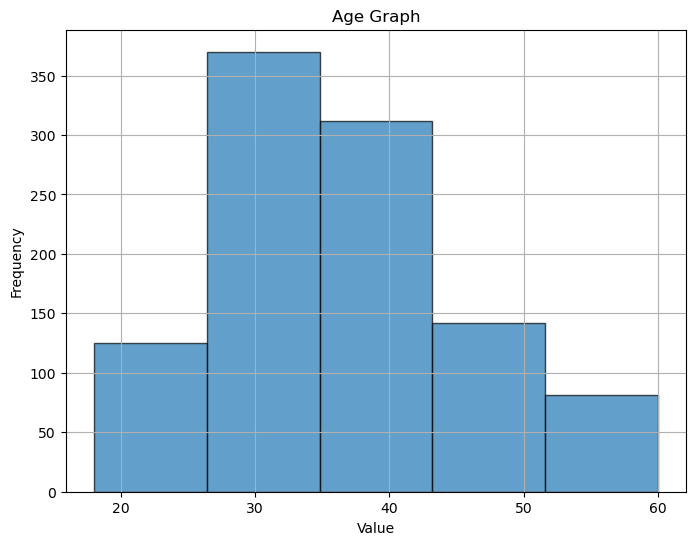

In [545]:
#7. Plot the histograms for all numerical variables

import matplotlib.pyplot as plt


# Function to create a histogram
def create_histogram(data, bins, title, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=bins, edgecolor='black', alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Example usage
create_histogram(final_data['Age'], bins=5, title='Age Graph', xlabel='Value', ylabel='Frequency')


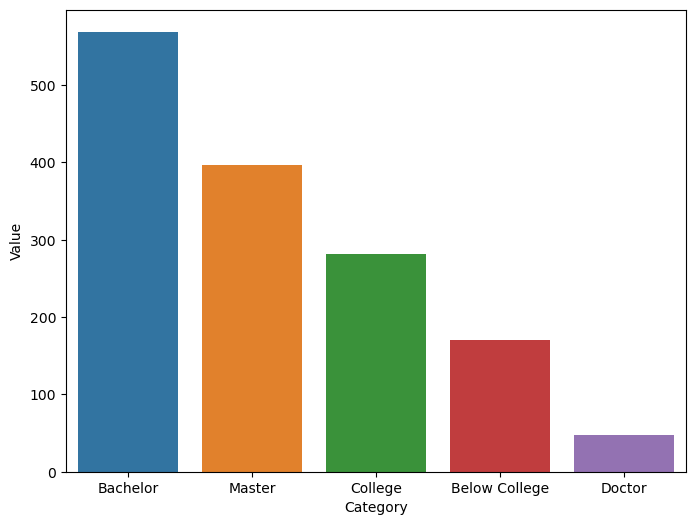

In [521]:
#8. Plot the bar charts for all categorical variables 
#(Note: Plot the frequency of each category in the categorical variables. You should create user defined function for the same)

import seaborn as sns

# Function to create a bar chart
def create_bar_chart(data, title, xlabel, ylabel):
    
    data=data.dropna()
    
    freq=data.value_counts(dropna=False)
    plt.figure(figsize=(8, 6))

    df=pd.DataFrame(freq)
    
    sns.barplot(x=df.index, y=df['count'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Example usage

create_bar_chart(final_data['Education'], title='Category vs Value', xlabel='Category', ylabel='Value')
  


In [522]:
#Q. Perform Data Cleaning Steps on final_data - 20 Marks
# a. Impute missing values -5 Marks
   
final_data=final_data.dropna()

# b. Outlier treatment - 5 Marks
#checking for outliers
#sns.boxplot(final_data['MonthlySalary'])
#sns.boxplot(final_data['NumCompaniesWorked'])
#sns.boxplot(final_data['StockOptionLevel'])
#sns.boxplot(final_data['TrainingTimesLastYear'])

def remove_outliers(df,col_name,lower_threshold,upper_threshold):
    df=df[df[col_name]<=upper_threshold]
    df=df[df[col_name]>=lower_threshold]
    return df

final_data=remove_outliers(final_data,'MonthlySalary',0,20000)

final_data=remove_outliers(final_data,'NumCompaniesWorked',0,8)

final_data=remove_outliers(final_data,'StockOptionLevel',0,2)

final_data=remove_outliers(final_data,'TrainingTimesLastYear',0,4)

final_data=remove_outliers(final_data,'YearsAtCompany',0,20)

final_data=remove_outliers(final_data,'YearsInCurrentRole',0,15)

final_data=remove_outliers(final_data,'YearsSinceLastPromotion',0,8)

final_data=remove_outliers(final_data,'YearsWithCurrManager',0,15)

In [523]:
# c. Encoding Variables (convert categorical into numerical variables)

final_data_old=final_data

def convert_cat_to_num(df, col_name):
    df[col_name]=df[col_name].astype('category')
    df[col_name+"_cat"]=df[col_name].cat.codes
    df=df.drop(col_name,axis=1)
    return df

for i in ['Education','EducationField','Gender','MaritalStatus','Over18','Department','BusinessTravel','JobInvolvement_x','JobRole','PerformanceRating',
'EnvironmentSatisfaction','JobInvolvement_y','JobSatisfaction','Manager_RelationshipSatisfaction','WorkLifeBalance','Attrition','OverTime']:
    final_data=convert_cat_to_num(final_data, i)



In [524]:
#Q. Perform below data analysis - 30 Marks
#a. Identify the Key demographic factors influencing attrition behavior. - 10 Marks

matrix=final_data.corr()
matrix['column_name']=matrix.index
matrix=matrix[matrix['column_name']=='Attrition_cat']
matrix_new_1=matrix[['Age','Education_cat','EducationField_cat','Gender_cat','MaritalStatus_cat']]

for col in matrix_new_1.columns:
    if matrix_new_1[col]['Attrition_cat']>=0.05:
        print(f"Strong Correlation between Attrition and {col}")
    else:
        print(f"No strong correlation between Attrition and {col}")

    

No strong correlation between Attrition and Age
No strong correlation between Attrition and Education_cat
No strong correlation between Attrition and EducationField_cat
No strong correlation between Attrition and Gender_cat
Strong Correlation between Attrition and MaritalStatus_cat


In [525]:
#b. How employee satisfaction variables influencing attrition? - 10 Marks

matrix=final_data.corr()
matrix['column_name']=matrix.index
matrix=matrix[matrix['column_name']=='Attrition_cat']
matrix_new_2=matrix[['EnvironmentSatisfaction_cat','JobInvolvement_y_cat','JobSatisfaction_cat','Manager_RelationshipSatisfaction_cat','WorkLifeBalance_cat']]

for col in matrix_new_2.columns:
    if matrix_new_2[col]['Attrition_cat']>=0.05:
          print(f"Strong Correlation between Attrition and {col}")
    else:
          print(f"No strong correlation between Attrition and {col}")



No strong correlation between Attrition and EnvironmentSatisfaction_cat
No strong correlation between Attrition and JobInvolvement_y_cat
No strong correlation between Attrition and JobSatisfaction_cat
No strong correlation between Attrition and Manager_RelationshipSatisfaction_cat
No strong correlation between Attrition and WorkLifeBalance_cat


In [526]:
#c. How employee job related variables influencing attrition? - 10 Marks

matrix=final_data.corr()
matrix['column_name']=matrix.index
matrix=matrix[matrix['column_name']=='Attrition_cat']
matrix_new_3=matrix[['Department_cat','BusinessTravel_cat','DistanceFromHome','JobInvolvement_x_cat','JobLevel','JobRole_cat','MonthlySalary',
                     'NumCompaniesWorked','OverTime_cat','PercentSalaryHike_last_year','PerformanceRating_cat','StockOptionLevel',
                     'TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

for col in matrix_new_3.columns:
    if matrix_new_3[col]['Attrition_cat']>=0.05:
          print(f"Strong Correlation between Attrition and {col}")
    else:
          print(f"No strong correlation between Attrition and {col}")



Strong Correlation between Attrition and Department_cat
No strong correlation between Attrition and BusinessTravel_cat
Strong Correlation between Attrition and DistanceFromHome
No strong correlation between Attrition and JobInvolvement_x_cat
No strong correlation between Attrition and JobLevel
No strong correlation between Attrition and JobRole_cat
No strong correlation between Attrition and MonthlySalary
No strong correlation between Attrition and NumCompaniesWorked
Strong Correlation between Attrition and OverTime_cat
No strong correlation between Attrition and PercentSalaryHike_last_year
No strong correlation between Attrition and PerformanceRating_cat
No strong correlation between Attrition and StockOptionLevel
No strong correlation between Attrition and TrainingTimesLastYear
No strong correlation between Attrition and YearsAtCompany
No strong correlation between Attrition and YearsInCurrentRole
No strong correlation between Attrition and YearsSinceLastPromotion
No strong correlati

According to the Boxplot,the monthly Salary of most of the employees ranges between 2500 to 7500


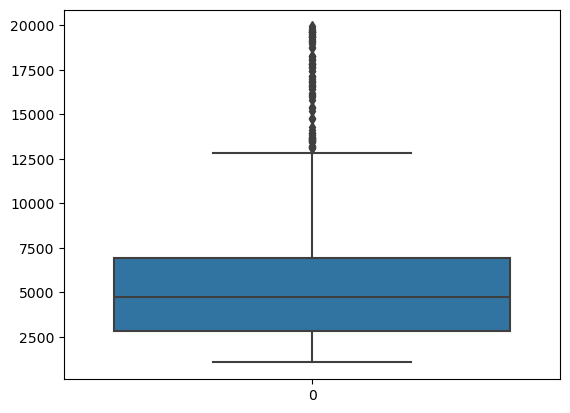

In [527]:
#Q. Create & Perform different data analysis (summaries by performing aggregations based on your understanding of data - at least 10 analysis) - 30 Marks (10 * 3 Marks)
#Note: You may perform different univariate, bivariate and multivariate analysis for this task
#Note: Need to write detailed insights from the analysis

#Univariate Analysis - 1
sns.boxplot(final_data['MonthlySalary'])

print("According to the Boxplot,the monthly Salary of most of the employees ranges between 2500 to 7500")


In [546]:
#Univariate Analysis -2
freq=final_data_old['Department'].value_counts(dropna=False)
print(f"The number of employees in different {freq}")

The number of employees in different Department
Research & Development    668
Sales                     318
Human Resources            44
Name: count, dtype: Int64


In [530]:
#Univariate Analysis - 3
print(f"The experience of employees in their current role is between : {min(final_data['YearsInCurrentRole'])} and {max(final_data['YearsInCurrentRole'])}")


The experience of employees in their current role is between : 0 and 15


In [531]:
#Univariate Analysis - 4
freq=final_data_old['JobSatisfaction'].value_counts(dropna=False)
print(f"The number of employees in with different {freq}")



The number of employees in with different JobSatisfaction
Very High    323
High         312
Low          200
Medium       195
Name: count, dtype: Int64


In [532]:
#displaying the final data before converting categorical variables to numerical
final_data_old

,EmployeeNumber,Age,Education,EducationField,Gender,MaritalStatus,Over18,Department,BusinessTravel,DistanceFromHome,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobInvolvement_y,JobSatisfaction,Manager_RelationshipSatisfaction,WorkLifeBalance,Attrition,Education_cat
0,1,41.0,College,Life Sciences,Female,Single,Y,Sales,Travel_Rarely,1,...,4,0,5,Medium,High,Very High,Low,Bad,Yes,2
1,2,49.0,Below College,Life Sciences,Male,Married,Y,Research & Development,Travel_Frequently,8,...,7,1,7,High,Medium,Medium,Very High,Better,No,1
2,4,37.0,College,Other,Male,Single,Y,Research & Development,Travel_Rarely,2,...,0,0,0,Very High,Medium,High,Medium,Better,Yes,2
3,5,33.0,Master,Life Sciences,Female,Married,Y,Research & Development,Travel_Frequently,3,...,7,3,0,Very High,High,High,High,Better,No,4
5,8,32.0,College,Life Sciences,Male,Single,Y,Research & Development,Travel_Frequently,2,...,7,3,6,Very High,High,Very High,High,Good,No,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,2060,26.0,Bachelor,Other,Female,Single,Y,Sales,Travel_Rarely,5,...,2,0,0,Very High,Medium,High,Very High,Better,No,0
1465,2061,36.0,College,Medical,Male,Married,Y,Research & Development,Travel_Frequently,23,...,2,0,3,High,Very High,Very High,High,Better,No,2
1467,2064,27.0,Bachelor,Life Sciences,Male,Married,Y,Research & Development,Travel_Rarely,4,...,2,0,3,Medium,Very High,Medium,Medium,Better,No,0
1468,2065,49.0,Bachelor,Medical,Male,Married,Y,Sales,Travel_Frequently,2,...,6,0,8,Very High,Medium,Medium,Very High,Good,No,0


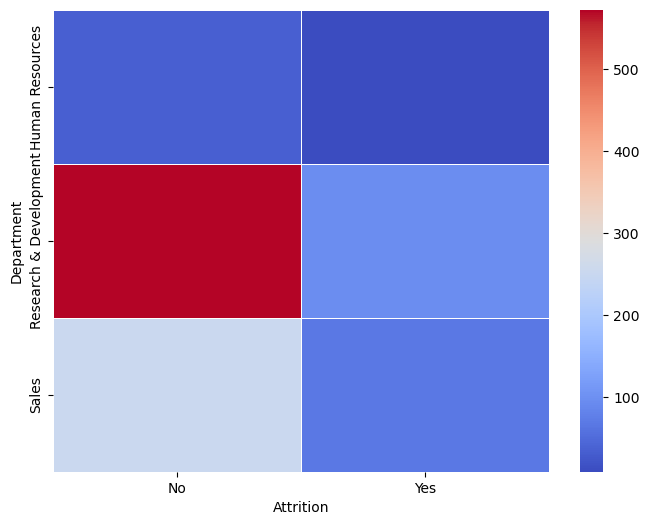

From the heatmap, it can be observed the attrition rate is highest in R&D Department


In [551]:
#Bivariate Analysis - 5
cross_tab_7=pd.crosstab(final_data_old['Department'], final_data_old['Attrition'])
plt.figure(figsize=(8,6))

sns.heatmap(cross_tab_7,cmap='coolwarm',linewidths=0.5)
plt.show()

print("From the heatmap, it can be observed the attrition rate is highest in R&D Department")

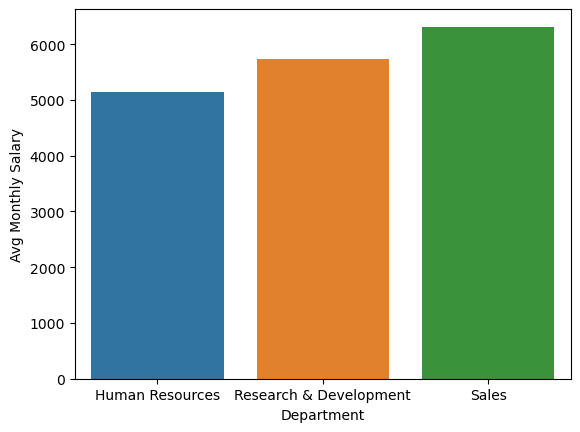

From the Bar chart we can learn that the Sales Department is the highest paid department, while HR is the lowest paid


In [533]:
# Analysis 6 - Bivariate Analysis 
analysis_6=final_data_old.groupby('Department')['MonthlySalary'].agg(['mean'])
sns.barplot(x=analysis_6.index, y=analysis_6['mean'])
plt.ylabel('Avg Monthly Salary')
plt.show()
print("From the Bar chart we can learn that the Sales Department is the highest paid department, while HR is the lowest paid")

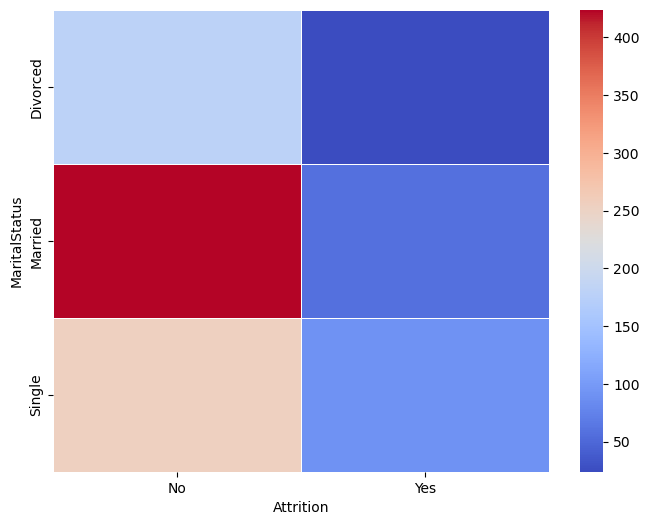

From the heatmap, it can be observed the attrition rate is highest in Divorced employees


In [534]:
#Bivariate Analysis - 7
cross_tab=pd.crosstab(final_data_old['MaritalStatus'], final_data_old['Attrition'])
plt.figure(figsize=(8,6))

sns.heatmap(cross_tab,cmap='coolwarm',linewidths=0.5)
plt.show()

print("From the heatmap, it can be observed the attrition rate is highest in Divorced employees")

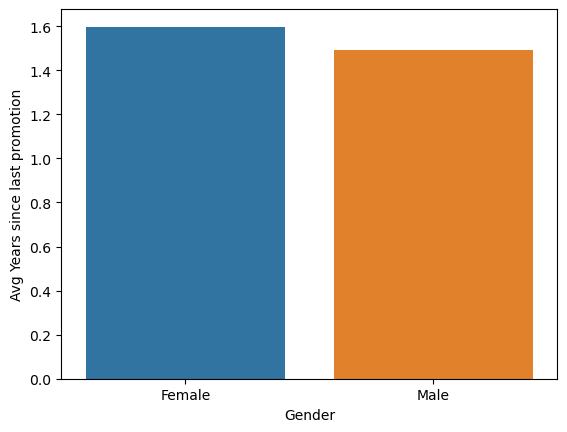

Female employees are promoted less frequently in comparison to male employees


In [535]:
#Bivariate Analysis - 8
analysis_8=final_data_old.groupby('Gender')['YearsSinceLastPromotion'].agg(['mean'])
sns.barplot(x=analysis_8.index, y=analysis_8['mean'])
plt.ylabel('Avg Years since last promotion')
plt.show()

print("Female employees are promoted less frequently in comparison to male employees")

In [536]:
#Multivariate Analysis- 9
matrix=final_data.corr()
matrix['column_name']=matrix.index
matrix=matrix[matrix['column_name']=='JobSatisfaction_cat']
matrix_new_9=matrix[['YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','StockOptionLevel']]

print("None of the fields have strong correlation with job satisfaction")
matrix_new_9.style.background_gradient(cmap='coolwarm')


None of the fields have strong correlation with job satisfaction


,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,StockOptionLevel
JobSatisfaction_cat,0.028882,0.017668,0.024153,0.026619,0.046967


In [537]:
#Multivariate Analysis - 10
analysis=final_data_old.groupby('WorkLifeBalance').agg({'DistanceFromHome':'mean','Age':'mean'})
print(analysis)

print("We can see that the work life Balance is BAD for employees whoe distance from home is far compared to the ones who stay closer to the work place.Age doesnt play much role in this scenario")


                 DistanceFromHome        Age
WorkLifeBalance                             
Bad                     10.593750  36.078125
Best                     7.491071  36.464286
Better                   9.450980  36.271242
Good                     9.252066  36.239669
We can see that the work life Balance is BAD for employees whoe distance from home is far compared to the ones who stay closer to the work place.Age doesnt play much role in this scenario


In [538]:
#Predictive Modelling

#a. Required to Perform data auditing, data cleaning, data processing, feature selection (key factors influencing attrition) etc
final_data.info()
final_data.describe()
final_data.isnull().sum()

#feature selection based on correlation in the above analysis
feature_df=final_data[['MaritalStatus_cat','Department_cat','DistanceFromHome','OverTime_cat','Attrition_cat']]

feature_df=feature_df.reset_index()
print(feature_df)

<class 'pandas.core.frame.DataFrame'>
Index: 1030 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   EmployeeNumber                        1030 non-null   int64  
 1   Age                                   1030 non-null   float64
 2   DistanceFromHome                      1030 non-null   int64  
 3   JobLevel                              1030 non-null   float64
 4   MonthlySalary                         1030 non-null   float64
 5   NumCompaniesWorked                    1030 non-null   float64
 6   PercentSalaryHike_last_year           1030 non-null   float64
 7   StockOptionLevel                      1030 non-null   float64
 8   TrainingTimesLastYear                 1030 non-null   int64  
 9   YearsAtCompany                        1030 non-null   int64  
 10  YearsInCurrentRole                    1030 non-null   int64  
 11  YearsSinceLastPromotio

In [539]:
#b. Split the final_data  into train & test (70%:30%) 
import statsmodels.api as sm

train_ratio=0.7
test_ratio=1-train_ratio

train_size=int(len(feature_df)*train_ratio)
train_data=feature_df[:train_size]
test_data=feature_df[train_size:]


In [540]:
#c. Build the binary classification model 

x_train=train_data[['MaritalStatus_cat','Department_cat','DistanceFromHome','OverTime_cat']]
x_train=sm.add_constant(x_train)
y_train=train_data['Attrition_cat']

x_test=test_data[['MaritalStatus_cat','Department_cat','DistanceFromHome','OverTime_cat']]
x_test=sm.add_constant(x_test)
y_test=test_data['Attrition_cat']

logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()

#Predict probabilities on the training and testing set
y_train_pred_prob = result.predict(x_train)
y_test_pred_prob = result.predict(x_test)

# Convert probabilities to binary predictions (threshold = 0.5)
y_train_pred = [1 if p > 0.5 else 0 for p in y_train_pred_prob]
y_test_pred = [1 if p > 0.5 else 0 for p in y_test_pred_prob]




Optimization terminated successfully.
         Current function value: 0.403830
         Iterations 6


In [541]:
#d. Calculate goodness of fit metrics like Confusion metrics, 
#Classification report (accuracy, recall, precision, f1score), ROC_AUC score etc. on both train & test data.

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve,accuracy_score,precision_score,recall_score

print("Training Data Metrics:")
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))
train_auc = roc_auc_score(y_train, y_train_pred_prob)
print("Train AUC:", train_auc)

#Evaluate the model on testing data
print("\nTesting Data Metrics:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
test_auc = roc_auc_score(y_test, y_test_pred_prob)
print("Test AUC:", test_auc)


Training Data Metrics:
Confusion Matrix:
 [[592   5]
 [110  14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       597
           1       0.74      0.11      0.20       124

    accuracy                           0.84       721
   macro avg       0.79      0.55      0.55       721
weighted avg       0.82      0.84      0.79       721

Train AUC: 0.7332360728373049

Testing Data Metrics:
Confusion Matrix:
 [[258   3]
 [ 42   6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       261
           1       0.67      0.12      0.21        48

    accuracy                           0.85       309
   macro avg       0.76      0.56      0.57       309
weighted avg       0.83      0.85      0.81       309

Test AUC: 0.6718550446998722


In [542]:
#e. Validate the model by comparing metrics

accuracy=accuracy_score(y_test,y_test_pred)
precision=precision_score(y_test,y_test_pred)
recall=recall_score(y_test,y_test_pred)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)

print("Precision of the model is high, but the recall is low. this means that the model might be too conservative, where it catches only the easiest positive cases, but might be missing many negative cases")


Accuracy: 0.8543689320388349
Precision: 0.6666666666666666
Recall: 0.125
Precision of the model is high, but the recall is low. this means that the model might be too conservative, where it catches only the easiest positive cases, but might be missing many negative cases


#f. Provide mathematical equation of the model 


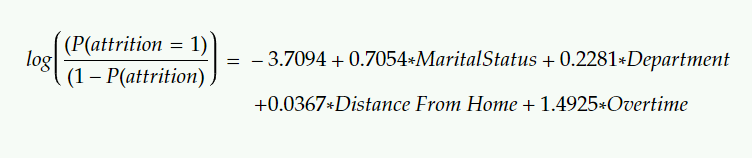


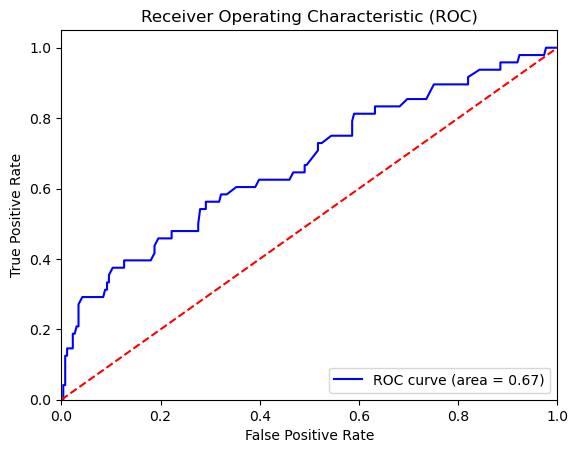

#Insights:


1.since the P-values for most of the variables in less than 0.05, the predicted values might not be very accurate.


2.The accuracy 85% which is very good for a classification model.


Recommendations: 


1.More co-related columns with the attrition column can give better accuracy


2.Since the dataset is small, the accuracy could have been increased if it was a larger dataset#


In [543]:
#g. Final outputs, Visualization, Insights, recommendations 

#Plotting ROC Curve for test data
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % test_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#Insights:
print("#Insights:\n\n")
print("1.since the P-values for most of the variables in less than 0.05, the predicted values might not be very accurate.\n\n")
print("2.The accuracy 85% which is very good for a classification model.\n\n")
print("Recommendations: \n\n")
print("1.More co-related columns with the attrition column can give better accuracy\n\n")
print("2.Since the dataset is small, the accuracy could have been increased if it was a larger dataset#")
